### 전체 데이터로 모델 돌려보기

In [7]:
import pandas as pd
import glob
import sys
import os
current_dir = os.getcwd()
sys.path.append(current_dir)  # 루트 디렉터리 경로 추가  # .py
sys.path.append(os.path.dirname(current_dir))  # 상위 디렉터리 경로 추가  # .ipynb

data_dir = "../../data/"

In [8]:
df_price = pd.read_csv(data_dir + "prep/item_price_filled_pivot.csv")
print(df_price.columns)
df_price

Index(['priceDate', 'market', '광어_avgPrice', '농어_avgPrice', '대게_avgPrice',
       '방어_avgPrice', '연어_avgPrice', '우럭_avgPrice', '참돔_avgPrice'],
      dtype='object')


,priceDate,market,광어_avgPrice,농어_avgPrice,대게_avgPrice,방어_avgPrice,연어_avgPrice,우럭_avgPrice,참돔_avgPrice
0,2015-02-06,노량진 2층,NaN,NaN,32000.0,NaN,NaN,NaN,NaN
1,2015-02-07,노량진 2층,NaN,NaN,32000.0,NaN,NaN,NaN,NaN
2,2015-02-08,노량진 2층,NaN,NaN,32000.0,NaN,NaN,NaN,NaN
3,2015-02-09,노량진 2층,NaN,NaN,32000.0,NaN,NaN,NaN,NaN
4,2015-02-10,노량진 2층,NaN,NaN,32000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
36616,2025-01-19,노량진 2층,40000.0,36430.0,80720.0,54000.0,6510.0,35000.0,36430.0
36617,2025-01-19,마포농수산물시장,45000.0,45000.0,NaN,NaN,7500.0,35000.0,40000.0
36618,2025-01-19,부산민락어민활어직판장,41000.0,NaN,NaN,NaN,NaN,33340.0,NaN
36619,2025-01-19,소래포구종합어시장,45000.0,45000.0,100000.0,50000.0,8000.0,30000.0,40000.0


In [9]:
df_trend = pd.read_csv(data_dir + "prep/search_trend_pivot.csv")
print(df_trend.columns)
df_trend

Index(['date', 'age', '광어_score', '농어_score', '대게_score', '방어_score',
       '연어_score', '우럭_score', '참돔_score'],
      dtype='object')


,date,age,광어_score,농어_score,대게_score,방어_score,연어_score,우럭_score,참돔_score
0,2016-01-01,06_12,1.398471,1.132805,3.010929,1.859701,1.575304,1.132505,1.066252
1,2016-01-01,13_18,1.522796,1.130881,3.265595,1.763233,1.955631,1.509413,1.256832
2,2016-01-01,19_24,1.813454,1.469683,3.654412,2.441575,2.358319,1.701487,1.333213
3,2016-01-01,25_29,1.902568,1.790530,5.434348,3.464911,2.451222,1.926941,1.847831
4,2016-01-01,30_34,1.791911,1.836360,7.978428,3.592016,2.577798,1.845889,1.815447
...,...,...,...,...,...,...,...,...,...
36163,2024-12-31,40_44,1.319904,1.195455,3.635282,2.244991,1.805642,1.307920,1.282782
36164,2024-12-31,45_49,1.284740,1.134216,3.363122,1.954657,1.797459,1.251667,1.232126
36165,2024-12-31,50_54,1.248271,1.207551,3.461566,2.364576,1.872422,1.265440,1.222392
36166,2024-12-31,55_59,1.336911,1.318047,3.886017,3.198864,2.146386,1.417366,1.315056


In [10]:
df_forecast = pd.read_csv(data_dir + "prep/forecast_agg.csv")
df_forecast

,지점,일시,풍속,GUST풍속,현지기압,습도,기온,수온,최대파고,유의파고,평균파고,파주기
0,22105,2015-01-01,10.808696,15.126087,1016.200000,65.130435,-0.121739,13.752174,6.7,3.095652,1.547826,8.165217
1,22105,2015-01-02,9.725000,13.791667,1018.875000,60.083333,1.029167,13.262500,6.5,2.683333,1.341667,7.816667
2,22105,2015-01-03,3.520833,6.083333,1019.725000,39.750000,4.337500,13.391667,4.2,1.625000,0.812500,7.483333
3,22105,2015-01-04,4.558333,6.695833,1015.858333,54.000000,8.091667,13.862500,2.4,1.108333,0.554167,5.954167
4,22105,2015-01-05,6.708696,8.939130,1016.352174,57.086957,10.613043,13.608696,3.6,1.060870,0.521739,4.739130
...,...,...,...,...,...,...,...,...,...,...,...,...
23736,22305,2024-11-19,3.641667,5.437500,1030.700000,51.625000,9.258333,17.062500,2.4,1.004167,0.654167,6.229167
23737,22305,2024-11-20,7.466667,9.854167,1021.891667,51.583333,11.937500,16.850000,3.5,1.079167,0.687500,5.075000
23738,22305,2024-11-21,8.333333,10.666667,1017.745833,51.750000,12.854167,17.212500,2.2,0.962500,0.620833,4.820833
23739,22305,2024-11-22,10.116667,13.275000,1020.795833,49.666667,10.362500,16.141667,4.1,1.904167,1.225000,5.808333


In [11]:
df_garak = pd.read_csv(data_dir + "prep/garak_price_filled.csv")
df_garak

,날짜,광어_대,광어_중,광어_소,방어_대,우럭_대,우럭_중,우럭_소,참돔_대,참돔_중,참돔_소
0,2018-01-03,21029.0,13823.0,3281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-04,20694.0,13933.0,10459.0,15904.0,10831.0,8320.0,6184.0,17115.0,15331.0,12730.0
2,2018-01-05,22167.0,20336.0,16440.0,16004.0,10831.0,8320.0,6184.0,16952.0,15549.0,12728.0
3,2018-01-06,22167.0,20336.0,16440.0,16895.0,11367.0,8285.0,5362.0,16802.0,15521.0,12641.0
4,2018-01-07,22167.0,20336.0,16440.0,16895.0,11367.0,8285.0,5362.0,16802.0,15521.0,12641.0
...,...,...,...,...,...,...,...,...,...,...,...
2565,2025-01-11,23000.0,22245.0,21405.0,27978.0,8600.0,8588.0,8500.0,21000.0,20565.0,15000.0
2566,2025-01-12,23000.0,22245.0,21405.0,27978.0,8600.0,8588.0,8500.0,21000.0,20565.0,15000.0
2567,2025-01-13,22564.0,21882.0,21000.0,27978.0,8600.0,8588.0,8500.0,21000.0,20565.0,15000.0
2568,2025-01-14,21764.0,20871.0,20000.0,27978.0,8600.0,8588.0,8500.0,21000.0,20565.0,15000.0


In [12]:
df_economy = pd.read_csv(data_dir + "prep/economy_filled.csv")
df_economy

,날짜,KOSPI,USD/KRW,WTI,VIX,Gold,Silver,MOVE
0,2018-01-03,2486.350098,1062.540039,61.630001,9.150000,1316.199951,17.184999,47.599998
1,2018-01-04,2466.459961,1063.939941,62.009998,9.220000,1319.400024,17.188999,47.380001
2,2018-01-05,2497.520020,1061.079956,61.439999,9.220000,1320.300049,17.205000,46.070000
3,2018-01-06,2497.520020,1061.079956,61.439999,9.220000,1320.300049,17.205000,46.070000
4,2018-01-07,2497.520020,1061.079956,61.439999,9.220000,1320.300049,17.205000,46.070000
...,...,...,...,...,...,...,...,...
2564,2025-01-10,2515.780029,1455.229980,76.570000,19.540001,2708.500000,31.091000,96.570000
2565,2025-01-11,2515.780029,1455.229980,76.570000,19.540001,2708.500000,31.091000,96.570000
2566,2025-01-12,2515.780029,1455.229980,76.570000,19.540001,2708.500000,31.091000,96.570000
2567,2025-01-13,2489.560059,1472.250000,78.820000,19.190001,2673.500000,30.091000,103.510002


In [13]:
price_tmp = df_price[['priceDate', 'market', '광어_avgPrice']]
price_tmp

,priceDate,market,광어_avgPrice
0,2015-02-06,노량진 2층,NaN
1,2015-02-07,노량진 2층,NaN
2,2015-02-08,노량진 2층,NaN
3,2015-02-09,노량진 2층,NaN
4,2015-02-10,노량진 2층,NaN
...,...,...,...
36616,2025-01-19,노량진 2층,40000.0
36617,2025-01-19,마포농수산물시장,45000.0
36618,2025-01-19,부산민락어민활어직판장,41000.0
36619,2025-01-19,소래포구종합어시장,45000.0


In [14]:
trend_tmp = df_trend.loc[df_trend['age'] == "19_24", ['date', 'age', '광어_score']]
trend_tmp

,date,age,광어_score
2,2016-01-01,19_24,1.813454
13,2016-01-02,19_24,1.979140
24,2016-01-03,19_24,1.915274
35,2016-01-04,19_24,1.589437
46,2016-01-05,19_24,1.626851
...,...,...,...
36115,2024-12-27,19_24,1.331929
36126,2024-12-28,19_24,1.450165
36137,2024-12-29,19_24,1.363048
36148,2024-12-30,19_24,1.348816


In [15]:

forecast_tmp = df_forecast.loc[df_forecast['지점'] == 22305, ['일시', '습도', '기온', '수온']]
forecast_tmp

,일시,습도,기온,수온
22955,2022-09-29,76.000000,19.991667,22.950000
22956,2022-09-30,83.375000,19.225000,21.141667
22957,2022-10-01,83.583333,20.129167,21.683333
22958,2022-10-02,62.500000,24.204167,25.083333
22959,2022-10-03,84.750000,24.179167,24.570833
...,...,...,...,...
23736,2024-11-19,51.625000,9.258333,17.062500
23737,2024-11-20,51.583333,11.937500,16.850000
23738,2024-11-21,51.750000,12.854167,17.212500
23739,2024-11-22,49.666667,10.362500,16.141667


In [16]:
garak_tmp = df_garak[['날짜', '광어_대', '광어_중', '광어_소']]
garak_tmp

,날짜,광어_대,광어_중,광어_소
0,2018-01-03,21029.0,13823.0,3281.0
1,2018-01-04,20694.0,13933.0,10459.0
2,2018-01-05,22167.0,20336.0,16440.0
3,2018-01-06,22167.0,20336.0,16440.0
4,2018-01-07,22167.0,20336.0,16440.0
...,...,...,...,...
2565,2025-01-11,23000.0,22245.0,21405.0
2566,2025-01-12,23000.0,22245.0,21405.0
2567,2025-01-13,22564.0,21882.0,21000.0
2568,2025-01-14,21764.0,20871.0,20000.0


In [17]:
economy_tmp = df_economy[['날짜', 'USD/KRW', 'WTI', 'Gold']]
economy_tmp

,날짜,USD/KRW,WTI,Gold
0,2018-01-03,1062.540039,61.630001,1316.199951
1,2018-01-04,1063.939941,62.009998,1319.400024
2,2018-01-05,1061.079956,61.439999,1320.300049
3,2018-01-06,1061.079956,61.439999,1320.300049
4,2018-01-07,1061.079956,61.439999,1320.300049
...,...,...,...,...
2564,2025-01-10,1455.229980,76.570000,2708.500000
2565,2025-01-11,1455.229980,76.570000,2708.500000
2566,2025-01-12,1455.229980,76.570000,2708.500000
2567,2025-01-13,1472.250000,78.820000,2673.500000


In [25]:
merged_data = pd.merge(price_tmp, trend_tmp, left_on="priceDate", right_on="date", how="left")
merged_data.dropna(inplace=True)
merged_data.drop(columns=["date", "age"], inplace=True)

merged_data = pd.merge(merged_data, forecast_tmp, left_on="priceDate", right_on="일시", how="left")
merged_data.dropna(inplace=True)
merged_data.drop(columns=["일시"], inplace=True)

merged_data = pd.merge(merged_data, garak_tmp, left_on="priceDate", right_on="날짜", how="left")
merged_data.dropna(inplace=True)
merged_data.drop(columns=["날짜"], inplace=True)

merged_data = pd.merge(merged_data, economy_tmp, left_on="priceDate", right_on="날짜", how="left")
merged_data.dropna(inplace=True)
merged_data.drop(columns=["날짜"], inplace=True)
merged_data


,priceDate,market,광어_avgPrice,광어_score,습도,기온,수온,광어_대,광어_중,광어_소,USD/KRW,WTI,Gold
0,2022-09-29,가락시장,41770.0,1.587208,76.0,19.991667,22.95,20638.0,18461.0,17365.0,1421.949951,81.230003,1658.500000
1,2022-09-29,강서농수산물시장,47500.0,1.587208,76.0,19.991667,22.95,20638.0,18461.0,17365.0,1421.949951,81.230003,1658.500000
2,2022-09-29,구리농수산물시장,37500.0,1.587208,76.0,19.991667,22.95,20638.0,18461.0,17365.0,1421.949951,81.230003,1658.500000
3,2022-09-29,노량진 1층,35470.0,1.587208,76.0,19.991667,22.95,20638.0,18461.0,17365.0,1421.949951,81.230003,1658.500000
4,2022-09-29,노량진 2층,34620.0,1.587208,76.0,19.991667,22.95,20638.0,18461.0,17365.0,1421.949951,81.230003,1658.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,2024-11-23,부산민락어민활어직판장,41250.0,1.312487,43.0,9.500000,15.60,25259.0,23538.0,21500.0,1399.599976,71.239998,2709.899902
7289,2024-11-23,소래포구종합어시장,39170.0,1.312487,43.0,9.500000,15.60,25259.0,23538.0,21500.0,1399.599976,71.239998,2709.899902
7290,2024-11-23,수원농수산물시장,42500.0,1.312487,43.0,9.500000,15.60,25259.0,23538.0,21500.0,1399.599976,71.239998,2709.899902
7291,2024-11-23,안양평촌농수산물시장,45000.0,1.312487,43.0,9.500000,15.60,25259.0,23538.0,21500.0,1399.599976,71.239998,2709.899902


In [33]:
df_merged = merged_data.drop(columns=["priceDate"])
# df_merged.to_csv(data_dir + "prep/test_mini_광어.csv", index=False)
# df_merged

In [32]:
df_merged = pd.read_csv(data_dir + "prep/test_mini_광어.csv")
df_merged

,market,광어_avgPrice,광어_score,습도,기온,수온,광어_대,광어_중,광어_소,USD/KRW,WTI,Gold
0,가락시장,41770.0,1.587208,76.0,19.991667,22.95,20638.0,18461.0,17365.0,1421.949951,81.230003,1658.500000
1,강서농수산물시장,47500.0,1.587208,76.0,19.991667,22.95,20638.0,18461.0,17365.0,1421.949951,81.230003,1658.500000
2,구리농수산물시장,37500.0,1.587208,76.0,19.991667,22.95,20638.0,18461.0,17365.0,1421.949951,81.230003,1658.500000
3,노량진 1층,35470.0,1.587208,76.0,19.991667,22.95,20638.0,18461.0,17365.0,1421.949951,81.230003,1658.500000
4,노량진 2층,34620.0,1.587208,76.0,19.991667,22.95,20638.0,18461.0,17365.0,1421.949951,81.230003,1658.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
7288,부산민락어민활어직판장,41250.0,1.312487,43.0,9.500000,15.60,25259.0,23538.0,21500.0,1399.599976,71.239998,2709.899902
7289,소래포구종합어시장,39170.0,1.312487,43.0,9.500000,15.60,25259.0,23538.0,21500.0,1399.599976,71.239998,2709.899902
7290,수원농수산물시장,42500.0,1.312487,43.0,9.500000,15.60,25259.0,23538.0,21500.0,1399.599976,71.239998,2709.899902
7291,안양평촌농수산물시장,45000.0,1.312487,43.0,9.500000,15.60,25259.0,23538.0,21500.0,1399.599976,71.239998,2709.899902


In [36]:
import pandas as pd
from pycaret.regression import setup, compare_models, get_config, pull, predict_model
import matplotlib.pyplot as plt
import koreanize_matplotlib

def run_automl_feature_importance(data, target, time_series_split=False):
    # PyCaret 설정
    if time_series_split is True:
        fold_strategy = "timeseries"
        data_split_shuffle = False
        fold_shuffle = False
    else:
        fold_strategy = "kfold"
        data_split_shuffle = True
        fold_shuffle = True
    setup(
        data=data,
        target=target,
        session_id=1030,  # 재현성을 위한 난수 시드
        normalize=True,  # 데이터 스케일링
        fold_strategy=fold_strategy,
        data_split_shuffle=data_split_shuffle,
        fold_shuffle=fold_shuffle,
        verbose=False
    )

    # 여러 모델 비교 및 최적 모델 선정
    best_model = compare_models(
        include=["rf", "lightgbm", "xgboost", "catboost"],
        verbose=False)
    
    # 최적 모델 이름과 평가지표 출력
    print("Best Model:", type(best_model).__name__)
    print("Model Performance Metrics:")
    metrics = pull()  # PyCaret에서 비교된 모델들의 평가지표를 가져옴
    print(metrics.loc[metrics.index[0]])  # 최적 모델의 성능만 출력
    
    importances = best_model.feature_importances_
    processed_features = get_config("X_train_transformed").columns
    feature_importance_df = pd.DataFrame({
        "Feature": processed_features,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(10, 6))
    feature_importance_df.plot(kind="bar", x="Feature", y="Importance", legend=False, color="skyblue")
    plt.title("Feature Importance")
    plt.ylabel("Importance")
    plt.xlabel("Features")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()
    return best_model

Best Model: CatBoostRegressor
Model Performance Metrics:
Model       CatBoost Regressor
MAE                   422.2541
MSE                  557605.26
RMSE                  744.0809
R2                      0.9611
RMSLE                   0.0187
MAPE                    0.0107
TT (Sec)                 0.561
Name: catboost, dtype: object


<Figure size 1000x600 with 0 Axes>

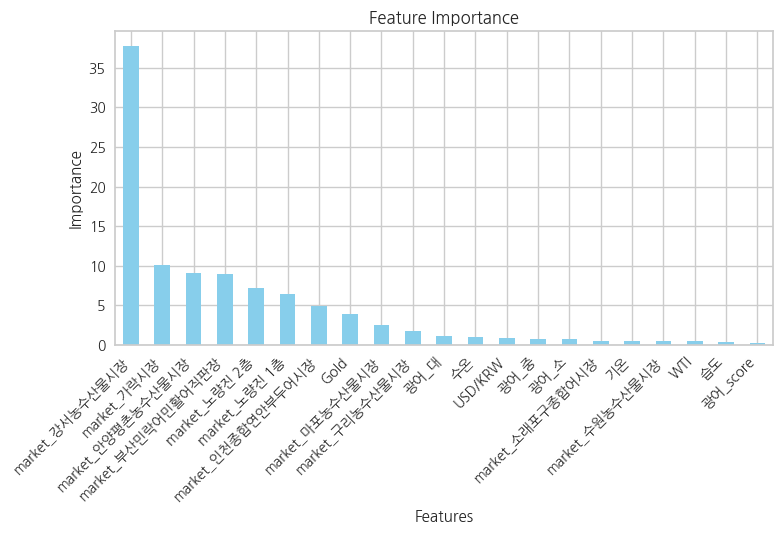

{'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 1030}

In [37]:
best_model = run_automl_feature_importance(df_merged, "광어_avgPrice")
best_model.get_params()

In [38]:
# 모델 추론
# 새로운 데이터 예제
new_data = pd.DataFrame({
    "market": ["가락시장", "강서농수산물시장"],
    "광어_score": [1.6, 1.6],
    "습도": [80, 80],
    "기온": [20.5, 20.5],
    "수온": [23.1, 23.1],
    "광어_대": [21000, 21000],
    "광어_중": [20000, 20000],
    "광어_소": [18000, 18000],
    "USD/KRW": [1400, 1400],
    "WTI": [80, 80],
    "Gold": [1700, 1700]
})

# 예측 수행
results = predict_model(best_model, data=new_data)
print(results["prediction_label"])


0    42037.443959
1    47325.027581
Name: prediction_label, dtype: float64
